In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_recall_fscore_support, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import BaggingRegressor, StackingRegressor, BaggingClassifier, RandomForestRegressor, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
def evaluateRModel(yTest, yPred, name):
    mse = mean_squared_error(yTest, yPred)
    mae = mean_absolute_error(yTest, yPred)
    r2 = r2_score(yTest, yPred)
    print(f"{name} Evaluation Metrics:")
    print(f"Mean Squared Error:\t{mse}")
    print(f"Mean Absolute Error:\t{mae}")
    print(f"R-Squared:\t\t{r2}")

In [4]:
def evaluateCModel(yTest, yPred, name):
    print(f"{name} Evaluation Metrics:")

    # Scalar Metrics
    accuracy = accuracy_score(yTest, yPred)
    [precision, recall, f1_score, support] = precision_recall_fscore_support(yTest, yPred, average='weighted', zero_division=0)
    print("Precision:\t", precision, "\nRecall:\t\t", recall, "\nF1-Score:\t", f1_score, "\nAccuracy:\t", accuracy)

    # Confusion Matrix
    confusion = confusion_matrix(yTest, yPred)
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion)
    cm.plot()
    plt.show()

In [5]:
data = pd.read_csv("Spotify_Youtube.csv")
data

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [6]:
subset = data.copy()[["Danceability", "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms", "Stream"]]
subset.dropna(inplace=True)
subset.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>,
        <Axes: title={'center': 'Key'}>],
       [<Axes: title={'center': 'Loudness'}>,
        <Axes: title={'center': 'Speechiness'}>,
        <Axes: title={'center': 'Acousticness'}>],
       [<Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Liveness'}>,
        <Axes: title={'center': 'Valence'}>],
       [<Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Duration_ms'}>,
        <Axes: title={'center': 'Stream'}>]], dtype=object)

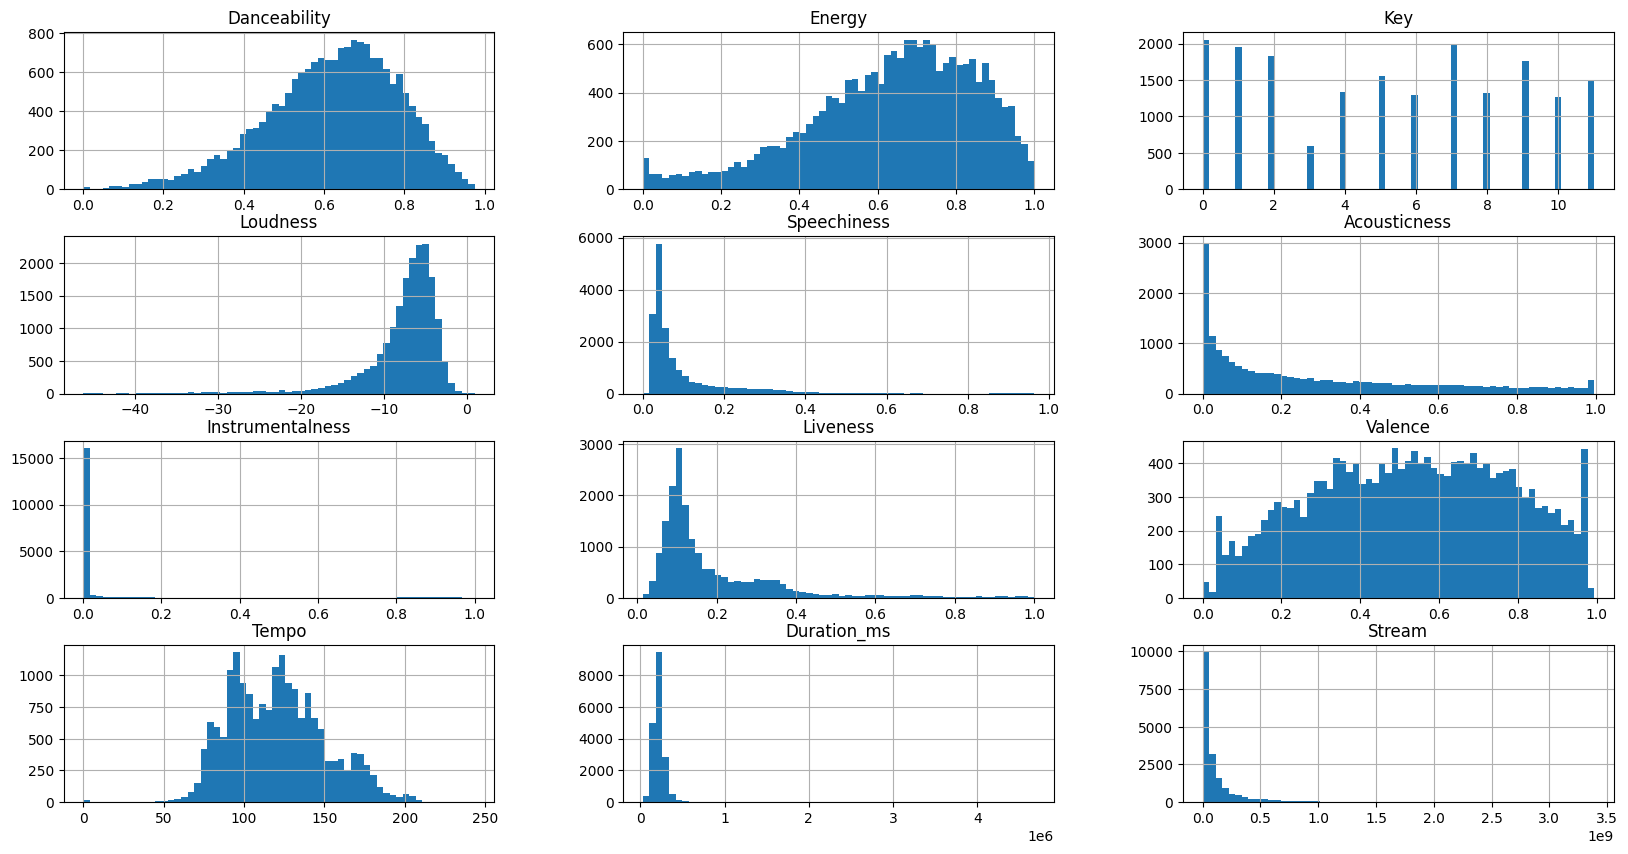

In [7]:
subset.hist(bins=60, figsize=(20,10))

In [8]:
def dropOutliers(data):
    stats = data.describe()
    for column in data:
        Q1 = stats[column]["25%"]
        Q3 = stats[column]["75%"]
        IQR = Q3 - Q1
        lowerBound = Q1 - (1.5 * IQR)
        upperBound = Q3 + (1.5 * IQR)
        data = data.loc[(data[column] > lowerBound) & (data[column] < upperBound)]
    return data

def displayBoxPlots():
    for column in subset:
        plt.figure()
        subset.boxplot([column], figsize=(10,5))

# displayBoxPlots()
print(f"There are {subset.shape[0]} rows")
subset = dropOutliers(subset)
print(f"There are {subset.shape[0]} rows")
# displayBoxPlots()

There are 18478 rows
There are 9563 rows


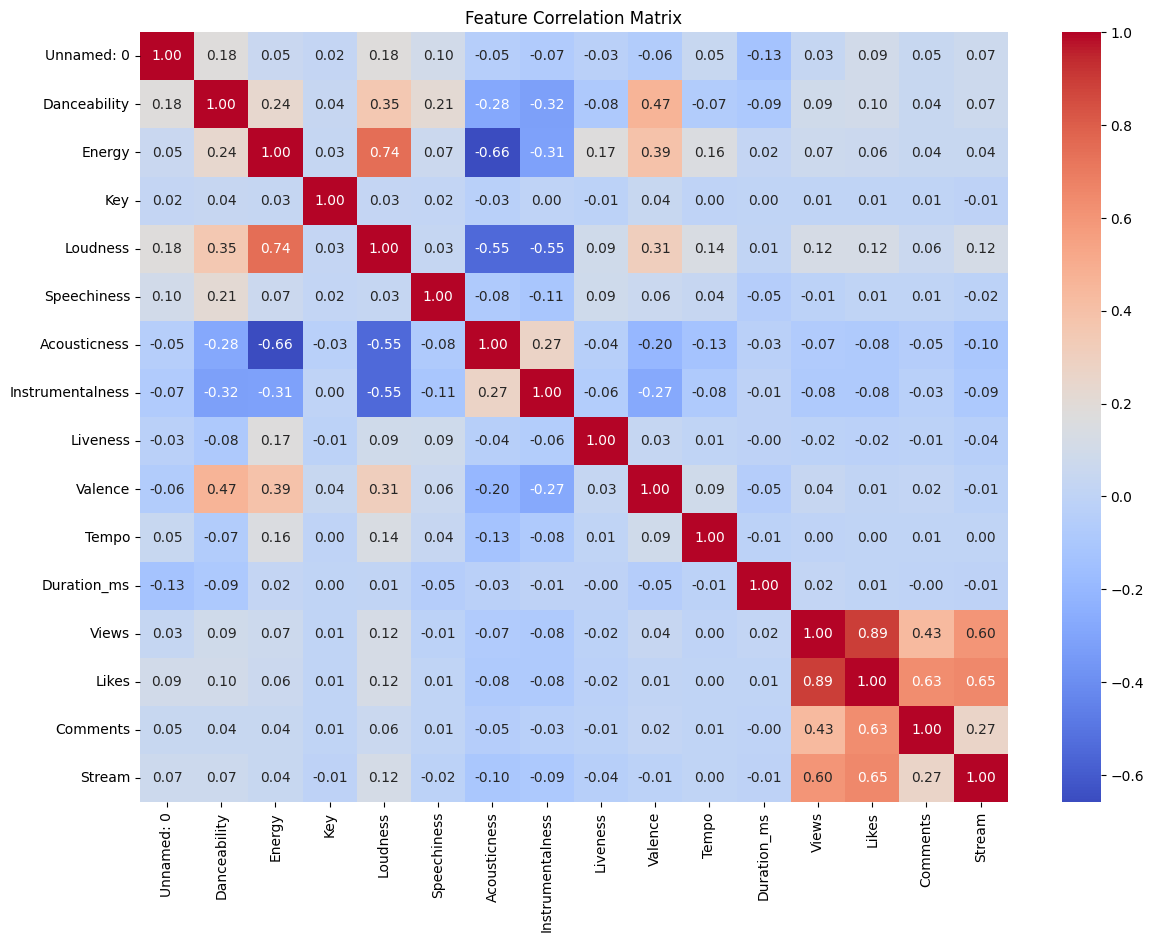

In [28]:
# Select only numeric columns for correlation analysis
numeric_df = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [9]:
subset.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
count,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9.563000e+03
mean,0.628987,0.654595,5.304716,-6.616444,0.062427,0.276716,0.000069,0.158793,0.557818,121.239271,215997.489177,7.104195e+07
std,0.142955,0.184776,3.574118,2.627870,0.040644,0.261703,0.000190,0.094312,0.237633,28.291058,48784.331410,7.208957e+07
min,0.185000,0.064400,0.000000,-14.785000,0.022000,0.000004,0.000000,0.014500,0.036600,37.114000,76234.000000,7.771000e+03
25%,0.533000,0.526000,2.000000,-8.037500,0.033800,0.049300,0.000000,0.092950,0.364000,98.029500,181770.500000,1.717517e+07
50%,0.639000,0.673000,5.000000,-6.136000,0.046100,0.193000,0.000000,0.122000,0.559000,120.018000,212334.000000,4.437099e+07
75%,0.735000,0.801000,8.000000,-4.741000,0.076300,0.455000,0.000019,0.204000,0.755000,139.972000,245737.000000,1.022270e+08
max,0.975000,0.996000,11.000000,0.829000,0.201000,0.986000,0.001210,0.448000,0.986000,204.418000,358267.000000,3.100837e+08


In [10]:
def sort(streams):
    groups = [(0, 1000000, "A"), (1000000, 10000000, "B"), (10000000, 100000000, "C"), (100000000, 1000000000, "D")]
    # groups = [(6.574000e+03, 1.709559e+07, "A"), (1.709559e+07, 4.871146e+07, "B"), (4.871146e+07, 1.343805e+08, "C"), (1.343805e+08, 3.386520e+09, "D")]
    # groups = [(7.771000e+03, 1.717517e+07, "B"), (1.717517e+07, 4.437099e+07, "C"), (4.437099e+07, 1.022270e+08, "D"), (1.022270e+08, 3.100837e+08, "E")]
    for l, r, groupName in groups:
        if l <= streams <= r:
            return groupName
    return "F"

x = StandardScaler().fit_transform(subset.drop(["Stream"], axis=1))
y = LabelEncoder().fit_transform(np.vectorize(sort)(subset["Stream"]))

smote = SMOTE(k_neighbors=4)
_x, _y = smote.fit_resample(x, y)

xTrain, xTest, yTrain, yTest = train_test_split(_x, _y, test_size=0.2, random_state=42)

array([[<Axes: title={'center': '0'}>]], dtype=object)

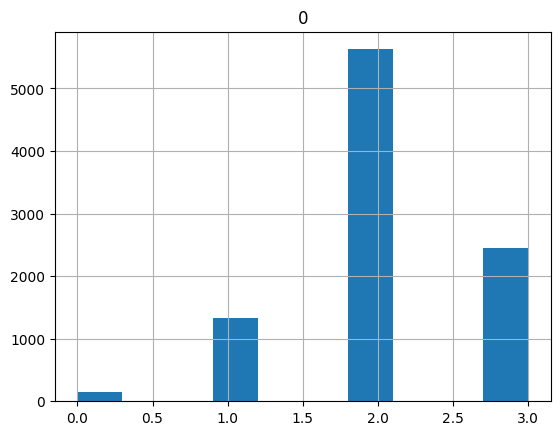

In [29]:
pd.DataFrame(y).hist()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tuned Stacking Classifier Evaluation Metrics:
Precision:	 0.7895354344543971 
Recall:		 0.796 
F1-Score:	 0.7918809620644027 
Accuracy:	 0.796


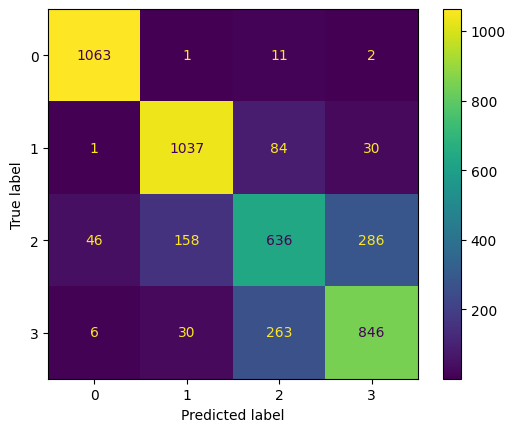

In [18]:
#Tuned Stacking Classifier via GridSearchCV
param_grid = {
    'estimators': [[
        ('KNeighbors', KNeighborsClassifier(n_neighbors=3)),
        ('DecisionTree', DecisionTreeClassifier(max_depth=3))
    ], [
        ('KNeighbors', KNeighborsClassifier(n_neighbors=5)),
        ('DecisionTree', DecisionTreeClassifier(max_depth=5))
    ]],
    'final_estimator': [DecisionTreeClassifier(), KNeighborsClassifier()],
    'cv': [3, 5], 
}

model = StackingClassifier(estimators=[
    ('KNeighbors', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier())
])

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(xTrain, yTrain)

#print(f"Best params: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

yPred = best_model.predict(xTest)
evaluateCModel(yTest, yPred, "Tuned Stacking Classifier")

Cross-validation scores: [0.69583333 0.70472222 0.70861111 0.70583333 0.7025    ]
Mean CV score: 0.7035 (+/- 0.0086)
Bagging Classifier Evaluation Metrics:
Precision:	 0.7180693747530629 
Recall:		 0.7271111111111112 
F1-Score:	 0.7195946172530422 
Accuracy:	 0.7271111111111112


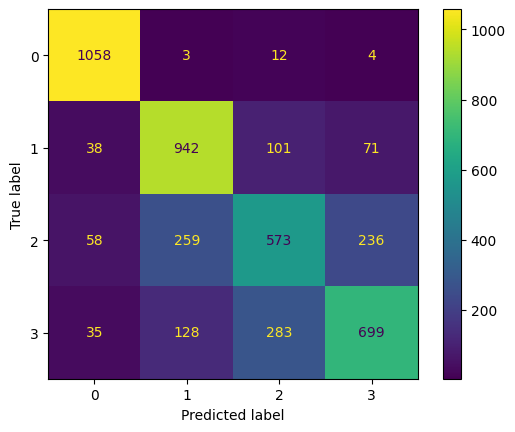

In [22]:
# Bagging Classifier
model = BaggingClassifier().fit(xTrain, yTrain)

cv_scores = cross_val_score(model, xTrain, yTrain, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

yPred = model.predict(xTest)
evaluateCModel(yTest, yPred, "Bagging Classifier")

KNN Classifier Evaluation Metrics:
Precision:	 0.7295103626290299 
Recall:		 0.7326666666666667 
F1-Score:	 0.7026848963005486 
Accuracy:	 0.7326666666666667


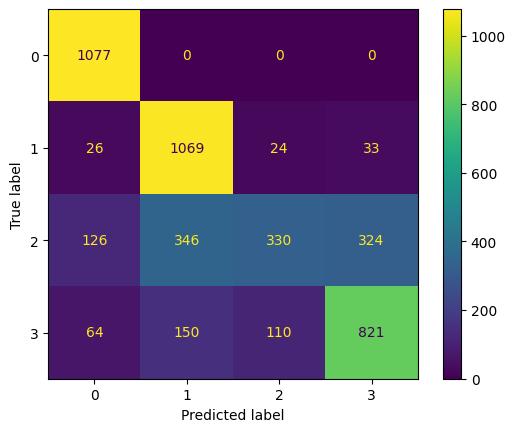

C:\Users\rojve\anaconda3\envs\CIS4930\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Tuned KNN Classifier Evaluation Metrics:
Precision:	 0.8427913707213472 
Recall:		 0.8362222222222222 
F1-Score:	 0.8201237083474407 
Accuracy:	 0.8362222222222222


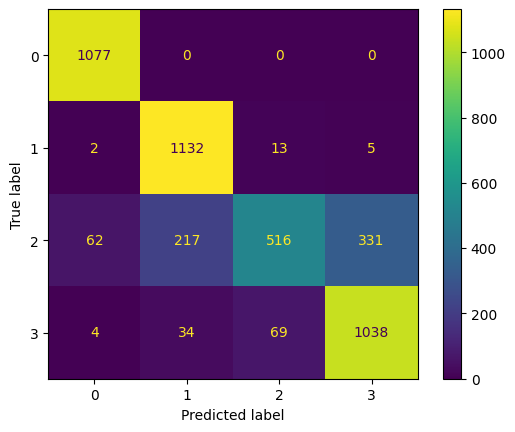

In [31]:
# KNN Classifier
model = KNeighborsClassifier().fit(xTrain, yTrain)
yPred = model.predict(xTest)
evaluateCModel(yTest, yPred, "KNN Classifier")

parameters = {"n_neighbors": [1, 100]}
gridSearchCV = GridSearchCV(model, parameters)
gridSearchCV.fit(xTrain, yTrain)
yPred = gridSearchCV.predict(xTest)
evaluateCModel(yTest, yPred, "Tuned KNN Classifier")

Random Forest Trees Evaluation Metrics:
Precision:	 0.8169054021744485 
Recall:		 0.8202222222222222 
F1-Score:	 0.8180881275138745 
Accuracy:	 0.8202222222222222


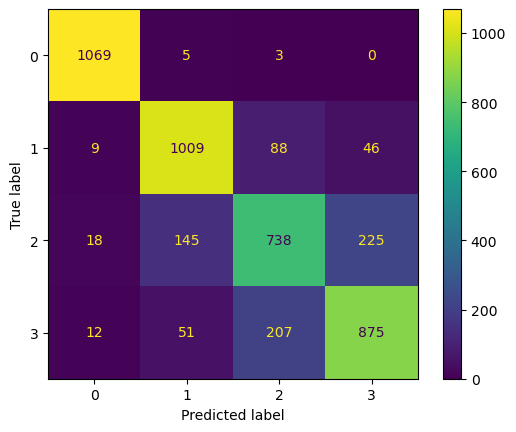

In [34]:
# Random Forest Trees
model = RandomForestClassifier().fit(xTrain, yTrain)
yPred = model.predict(xTest)
evaluateCModel(yTest, yPred, "Random Forest Trees")

Neural Network Evaluation Metrics:
Precision:	 0.8305128673857709 
Recall:		 0.8344444444444444 
F1-Score:	 0.8316297281902311 
Accuracy:	 0.8344444444444444


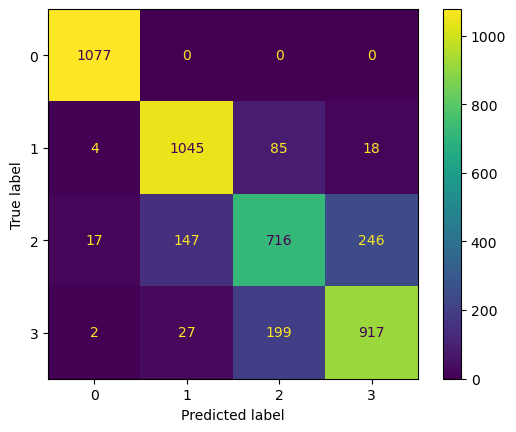

In [72]:
# Neural Network
model = MLPClassifier(hidden_layer_sizes=(500, 500), activation='relu', solver='adam', max_iter=1000).fit(xTrain, yTrain)
yPred = model.predict(xTest)
evaluateCModel(yTest, yPred, "Neural Network")

Bagging Classifier w Random Forest Evaluation Metrics:
Precision:	 0.8018724435437479 
Recall:		 0.8062222222222222 
F1-Score:	 0.8030076217356971 
Accuracy:	 0.8062222222222222


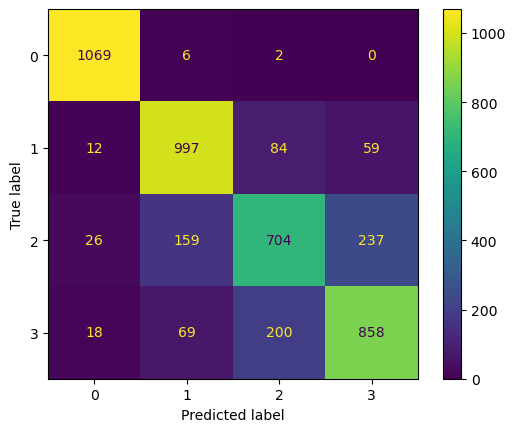

In [36]:
# Bagging Classifier + Random Forest
model = BaggingClassifier(estimator=RandomForestClassifier()).fit(xTrain, yTrain)
yPred = model.predict(xTest)
evaluateCModel(yTest, yPred, "Bagging Classifier w Random Forest")

Gradient Boosting Classifier Evaluation Metrics:
Precision:	 0.8305728566981403 
Recall:		 0.8242222222222222 
F1-Score:	 0.8251157915420545 
Accuracy:	 0.8242222222222222


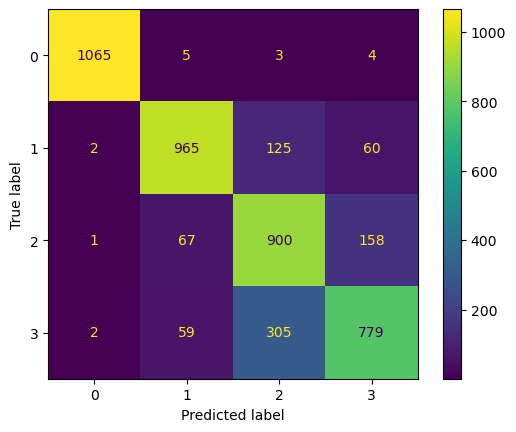

In [37]:
# Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=10, random_state=0).fit(xTrain, yTrain)
yPred = model.predict(xTest)
evaluateCModel(yTest, yPred, "Gradient Boosting Classifier")